In [1]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# use this code in the anaconda prompt, not in jupyter notebook
#conda install -c conda-forge python-annoy
#pip install bbknn

^C


In [2]:
pip install gseapy

     |████████████████████████████████| 1.5 MB 1.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 964 kB 3.4 MB/s eta 0:00:01
  Using cached grequests-0.6.0-py3-none-any.whl (5.2 kB)
     |████████████████████████████████| 47 kB 5.2 MB/s eta 0:00:01
  Using cached easydev-0.12.0-py3-none-any.whl
     |████████████████████████████████| 4.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 4.9 MB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached gevent-21.12.0-cp38-cp38-macosx_10_14_x86_64.whl (1.9 MB)
  Using cached zope.interface-5.4.0-cp38-cp38-macosx_10_14_x86_64.whl (208 kB)
     |████████████████████████████████| 93 kB 2.1 MB/s eta 0:00:011
  Using cached zope.event-4.5.0-py2.py3-none-any.whl (6.8 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  ERROR: Command errored 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import bbknn

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-05-24 11:33.


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [4]:
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
import os
os.chdir('F:\Ko\IM_NonIM')

In [6]:
import scanpy.external as sce

In [7]:
import decoupler as dc

# bulk RNA-seq analysis with FPKM counts
# FPKM made from R script

In [8]:
IMnonIM = pd.read_csv('FPKM_converted_from_raw_counts.csv', index_col=0)
IMnonIM

,EP04,EP08,EP09,EP12,EP14,EP25,EP39,EP59,EP107,EP112,EP23,EP29,EP33,EP45,EP54,EP63,EP114
TSPAN6,-2.725335,0.475341,-2.725335,-2.725335,7.336359,1.482660,6.585748,5.832376,7.700979,7.333164,5.909027,7.173809,6.055953,-2.725335,6.207467,6.216865,6.145960
TNMD,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,7.501960,4.865127,4.865127,4.865127,8.524187,10.804342,4.865127,4.865127,4.865127,4.865127
DPM1,6.804183,6.297125,-5.392497,7.357102,7.963312,-5.392497,6.860196,6.281916,7.066192,6.152167,6.861545,6.919358,4.806276,4.689125,7.440755,6.573360,7.113058
SCYL3,4.278379,7.025738,-3.318806,3.383805,5.562067,7.591045,6.497107,6.667820,5.204668,7.688613,5.810292,6.751267,5.041809,6.952010,5.494129,5.230301,6.154644
C1orf112,3.114636,5.039775,-5.190142,6.030538,5.115526,-5.190142,6.652580,6.133424,4.191199,8.072535,4.505764,5.590835,4.861844,5.745647,4.992174,4.522206,5.499778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA..23928,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
NA..23929,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
NA..23930,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
NA..23931,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [9]:
df_20 = pd.DataFrame(IMnonIM)

In [10]:
df_20

,EP04,EP08,EP09,EP12,EP14,EP25,EP39,EP59,EP107,EP112,EP23,EP29,EP33,EP45,EP54,EP63,EP114
TSPAN6,-2.725335,0.475341,-2.725335,-2.725335,7.336359,1.482660,6.585748,5.832376,7.700979,7.333164,5.909027,7.173809,6.055953,-2.725335,6.207467,6.216865,6.145960
TNMD,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,7.501960,4.865127,4.865127,4.865127,8.524187,10.804342,4.865127,4.865127,4.865127,4.865127
DPM1,6.804183,6.297125,-5.392497,7.357102,7.963312,-5.392497,6.860196,6.281916,7.066192,6.152167,6.861545,6.919358,4.806276,4.689125,7.440755,6.573360,7.113058
SCYL3,4.278379,7.025738,-3.318806,3.383805,5.562067,7.591045,6.497107,6.667820,5.204668,7.688613,5.810292,6.751267,5.041809,6.952010,5.494129,5.230301,6.154644
C1orf112,3.114636,5.039775,-5.190142,6.030538,5.115526,-5.190142,6.652580,6.133424,4.191199,8.072535,4.505764,5.590835,4.861844,5.745647,4.992174,4.522206,5.499778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA..23928,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
NA..23929,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
NA..23930,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
NA..23931,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [11]:
# Replace infinite data with nan
df_21 = df_20[df_20.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df_21

,EP04,EP08,EP09,EP12,EP14,EP25,EP39,EP59,EP107,EP112,EP23,EP29,EP33,EP45,EP54,EP63,EP114
TSPAN6,-2.725335,0.475341,-2.725335,-2.725335,7.336359,1.482660,6.585748,5.832376,7.700979,7.333164,5.909027,7.173809,6.055953,-2.725335,6.207467,6.216865,6.145960
TNMD,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,7.501960,4.865127,4.865127,4.865127,8.524187,10.804342,4.865127,4.865127,4.865127,4.865127
DPM1,6.804183,6.297125,-5.392497,7.357102,7.963312,-5.392497,6.860196,6.281916,7.066192,6.152167,6.861545,6.919358,4.806276,4.689125,7.440755,6.573360,7.113058
SCYL3,4.278379,7.025738,-3.318806,3.383805,5.562067,7.591045,6.497107,6.667820,5.204668,7.688613,5.810292,6.751267,5.041809,6.952010,5.494129,5.230301,6.154644
C1orf112,3.114636,5.039775,-5.190142,6.030538,5.115526,-5.190142,6.652580,6.133424,4.191199,8.072535,4.505764,5.590835,4.861844,5.745647,4.992174,4.522206,5.499778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA..23872,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,9.716128,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018
NA..23874,7.772018,7.772018,7.772018,7.772018,7.772018,7.772018,9.293479,7.772018,7.772018,7.772018,7.772018,7.772018,7.772018,12.617960,7.772018,7.772018,7.772018
NA..23875,10.965390,6.552335,1.161067,1.161067,7.912931,1.161067,6.384825,3.304744,5.071633,6.335477,5.770387,6.252524,1.161067,1.161067,1.161067,4.484035,3.982543
NA..23880,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,8.131166,7.187055,7.187055,7.187055,12.033000,7.187055,7.187055,10.008530


In [12]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28453 entries, TSPAN6 to NA..23883
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EP04    28453 non-null  float64
 1   EP08    28453 non-null  float64
 2   EP09    28453 non-null  float64
 3   EP12    28453 non-null  float64
 4   EP14    28453 non-null  float64
 5   EP25    28453 non-null  float64
 6   EP39    28453 non-null  float64
 7   EP59    28453 non-null  float64
 8   EP107   28453 non-null  float64
 9   EP112   28453 non-null  float64
 10  EP23    28453 non-null  float64
 11  EP29    28453 non-null  float64
 12  EP33    28453 non-null  float64
 13  EP45    28453 non-null  float64
 14  EP54    28453 non-null  float64
 15  EP63    28453 non-null  float64
 16  EP114   28453 non-null  float64
dtypes: float64(17)
memory usage: 3.9+ MB


In [13]:
# Drop rows with NaN
df_21 = pd.DataFrame(df_21)
df_21.dropna(inplace=True)
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28453 entries, TSPAN6 to NA..23883
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EP04    28453 non-null  float64
 1   EP08    28453 non-null  float64
 2   EP09    28453 non-null  float64
 3   EP12    28453 non-null  float64
 4   EP14    28453 non-null  float64
 5   EP25    28453 non-null  float64
 6   EP39    28453 non-null  float64
 7   EP59    28453 non-null  float64
 8   EP107   28453 non-null  float64
 9   EP112   28453 non-null  float64
 10  EP23    28453 non-null  float64
 11  EP29    28453 non-null  float64
 12  EP33    28453 non-null  float64
 13  EP45    28453 non-null  float64
 14  EP54    28453 non-null  float64
 15  EP63    28453 non-null  float64
 16  EP114   28453 non-null  float64
dtypes: float64(17)
memory usage: 3.9+ MB


In [14]:
df_21

,EP04,EP08,EP09,EP12,EP14,EP25,EP39,EP59,EP107,EP112,EP23,EP29,EP33,EP45,EP54,EP63,EP114
TSPAN6,-2.725335,0.475341,-2.725335,-2.725335,7.336359,1.482660,6.585748,5.832376,7.700979,7.333164,5.909027,7.173809,6.055953,-2.725335,6.207467,6.216865,6.145960
TNMD,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,7.501960,4.865127,4.865127,4.865127,8.524187,10.804342,4.865127,4.865127,4.865127,4.865127
DPM1,6.804183,6.297125,-5.392497,7.357102,7.963312,-5.392497,6.860196,6.281916,7.066192,6.152167,6.861545,6.919358,4.806276,4.689125,7.440755,6.573360,7.113058
SCYL3,4.278379,7.025738,-3.318806,3.383805,5.562067,7.591045,6.497107,6.667820,5.204668,7.688613,5.810292,6.751267,5.041809,6.952010,5.494129,5.230301,6.154644
C1orf112,3.114636,5.039775,-5.190142,6.030538,5.115526,-5.190142,6.652580,6.133424,4.191199,8.072535,4.505764,5.590835,4.861844,5.745647,4.992174,4.522206,5.499778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA..23872,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,9.716128,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018
NA..23874,7.772018,7.772018,7.772018,7.772018,7.772018,7.772018,9.293479,7.772018,7.772018,7.772018,7.772018,7.772018,7.772018,12.617960,7.772018,7.772018,7.772018
NA..23875,10.965390,6.552335,1.161067,1.161067,7.912931,1.161067,6.384825,3.304744,5.071633,6.335477,5.770387,6.252524,1.161067,1.161067,1.161067,4.484035,3.982543
NA..23880,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,8.131166,7.187055,7.187055,7.187055,12.033000,7.187055,7.187055,10.008530


In [15]:
df_21 = df_21.dropna()
df_21

,EP04,EP08,EP09,EP12,EP14,EP25,EP39,EP59,EP107,EP112,EP23,EP29,EP33,EP45,EP54,EP63,EP114
TSPAN6,-2.725335,0.475341,-2.725335,-2.725335,7.336359,1.482660,6.585748,5.832376,7.700979,7.333164,5.909027,7.173809,6.055953,-2.725335,6.207467,6.216865,6.145960
TNMD,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,4.865127,7.501960,4.865127,4.865127,4.865127,8.524187,10.804342,4.865127,4.865127,4.865127,4.865127
DPM1,6.804183,6.297125,-5.392497,7.357102,7.963312,-5.392497,6.860196,6.281916,7.066192,6.152167,6.861545,6.919358,4.806276,4.689125,7.440755,6.573360,7.113058
SCYL3,4.278379,7.025738,-3.318806,3.383805,5.562067,7.591045,6.497107,6.667820,5.204668,7.688613,5.810292,6.751267,5.041809,6.952010,5.494129,5.230301,6.154644
C1orf112,3.114636,5.039775,-5.190142,6.030538,5.115526,-5.190142,6.652580,6.133424,4.191199,8.072535,4.505764,5.590835,4.861844,5.745647,4.992174,4.522206,5.499778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA..23872,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,9.716128,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018,8.772018
NA..23874,7.772018,7.772018,7.772018,7.772018,7.772018,7.772018,9.293479,7.772018,7.772018,7.772018,7.772018,7.772018,7.772018,12.617960,7.772018,7.772018,7.772018
NA..23875,10.965390,6.552335,1.161067,1.161067,7.912931,1.161067,6.384825,3.304744,5.071633,6.335477,5.770387,6.252524,1.161067,1.161067,1.161067,4.484035,3.982543
NA..23880,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,7.187055,8.131166,7.187055,7.187055,7.187055,12.033000,7.187055,7.187055,10.008530


In [17]:
df_21_1 = df_21.T
df_21_1

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,NA..23854,NA..23857,NA..23861,NA..23868,NA..23869,NA..23872,NA..23874,NA..23875,NA..23880,NA..23883
EP04,-2.725335,4.865127,6.804183,4.278379,3.114636,-1.275106,3.923765,7.854783,10.430359,6.339771,...,7.772018,8.772018,3.457321,1.204214,6.865127,8.772018,7.772018,10.965390,7.187055,6.488096
EP08,0.475341,4.865127,6.297125,7.025738,5.039775,5.098871,5.964426,6.328400,6.737000,6.601162,...,7.772018,8.772018,3.457321,9.060067,6.865127,8.772018,7.772018,6.552335,7.187055,9.688772
EP09,-2.725335,4.865127,-5.392497,-3.318806,-5.190142,-1.275106,-7.058981,-3.292944,-6.416648,-2.793084,...,7.772018,8.772018,3.457321,1.204214,6.865127,8.772018,7.772018,1.161067,7.187055,6.488096
EP12,-2.725335,4.865127,7.357102,3.383805,6.030538,-1.275106,4.910843,-3.292944,6.967408,5.943389,...,7.772018,8.772018,3.457321,1.204214,6.865127,8.772018,7.772018,1.161067,7.187055,6.488096
EP14,7.336359,4.865127,7.963312,5.562067,5.115526,5.681423,6.597917,6.849596,6.482603,4.822124,...,7.772018,8.772018,3.457321,1.204214,6.865127,8.772018,7.772018,7.912931,7.187055,6.488096
EP25,1.482660,4.865127,-5.392497,7.591045,-5.190142,11.017830,5.668887,-3.292944,-0.268421,-2.793084,...,7.772018,8.772018,3.457321,1.204214,6.865127,8.772018,7.772018,1.161067,7.187055,6.488096
EP39,6.585748,4.865127,6.860196,6.497107,6.652580,6.982014,6.543867,6.733952,5.813750,6.954614,...,7.772018,10.293480,6.460125,6.515543,6.865127,8.772018,9.293479,6.384825,7.187055,6.488096
EP59,5.832376,7.501960,6.281916,6.667820,6.133424,6.558129,5.816541,6.626840,5.411680,7.316688,...,10.408850,8.772018,3.457321,6.173509,6.865127,8.772018,7.772018,3.304744,7.187055,8.220470
EP107,7.700979,4.865127,7.066192,5.204668,4.191199,5.502637,6.814891,7.093463,6.756435,6.304476,...,7.772018,8.772018,3.457321,1.204214,6.865127,8.772018,7.772018,5.071633,7.187055,9.362226
EP112,7.333164,4.865127,6.152167,7.688613,8.072535,6.666591,6.090026,6.526188,5.867284,7.044289,...,7.772018,8.772018,3.457321,6.340471,6.865127,9.716128,7.772018,6.335477,8.131166,6.488096


In [18]:
df_21_1.to_csv('IM_nonIM_for_adata_from_FPKM.csv')

# checked

In [8]:
adata_21 = anndata.read_csv('IM_nonIM_for_adata_from_FPKM.csv')
adata_21

AnnData object with n_obs × n_vars = 17 × 28453

In [499]:
#adata_21 = anndata.read_csv('IM_nonIM_for_adata_from_raw.csv')
#adata_21

AnnData object with n_obs × n_vars = 17 × 57820

In [10]:
adata_21.obs['dataset'] ="IM_nonIM"

In [11]:
adata_21.obs['patient'] = ['EP09','EP12','EP25','EP39','EP59','EP107','EP112','EP14','EP04','EP08',
                          'EP29','EP33','EP63','EP114','EP23','EP54','EP45']
adata_21.obs

,dataset,patient
EP04,IM_nonIM,EP09
EP08,IM_nonIM,EP12
EP09,IM_nonIM,EP25
EP12,IM_nonIM,EP39
EP14,IM_nonIM,EP59
EP25,IM_nonIM,EP107
EP39,IM_nonIM,EP112
EP59,IM_nonIM,EP14
EP107,IM_nonIM,EP04
EP112,IM_nonIM,EP08


In [12]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'IM': ['EP23','EP29','EP33','EP45','EP54','EP63','EP114'],
             'Non-IM': ['EP04','EP08','EP09','EP12','EP14','EP25','EP39','EP59','EP107','EP112'],
             
            }

# Initialize empty column in cell metadata
adata_21.obs['class'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_21.obs.patient).isin(cell_dict[i])
    adata_21.obs.loc[ind,'class'] = i
adata_21.obs

,dataset,patient,class
EP04,IM_nonIM,EP09,Non-IM
EP08,IM_nonIM,EP12,Non-IM
EP09,IM_nonIM,EP25,Non-IM
EP12,IM_nonIM,EP39,Non-IM
EP14,IM_nonIM,EP59,Non-IM
EP25,IM_nonIM,EP107,Non-IM
EP39,IM_nonIM,EP112,Non-IM
EP59,IM_nonIM,EP14,Non-IM
EP107,IM_nonIM,EP04,Non-IM
EP112,IM_nonIM,EP08,Non-IM


In [23]:
# Store raw counts in layers
adata_21.layers['counts'] = adata_21.X

In [24]:
adata_21

AnnData object with n_obs × n_vars = 17 × 28453
    obs: 'dataset', 'patient', 'class'
    layers: 'counts'

In [25]:
adata_21.var_names_make_unique()
adata_21

AnnData object with n_obs × n_vars = 17 × 28453
    obs: 'dataset', 'patient', 'class'
    layers: 'counts'

In [26]:
adata_21.obs['class'] = adata_21.obs['class'].astype('category')
adata_21.obs['patient'] = adata_21.obs['patient'].astype('category')
adata_21.obs['dataset'] = adata_21.obs['dataset'].astype('category')

In [27]:
adata_21.obs

,dataset,patient,class
EP04,IM_nonIM,EP09,Non-IM
EP08,IM_nonIM,EP12,Non-IM
EP09,IM_nonIM,EP25,Non-IM
EP12,IM_nonIM,EP39,Non-IM
EP14,IM_nonIM,EP59,Non-IM
EP25,IM_nonIM,EP107,Non-IM
EP39,IM_nonIM,EP112,Non-IM
EP59,IM_nonIM,EP14,Non-IM
EP107,IM_nonIM,EP04,Non-IM
EP112,IM_nonIM,EP08,Non-IM


In [31]:
HSF1_genes = ["HSPA1A", "HSPA1B", "DNAJB1", "HSPB1", "HSP90AA1",
                         "HSPA6", "HSPA8", "HSPH1", "SERPINH1", "UBB", "FKBP4", "MRPL18", "DEDD2", "HSP90AB1", "PTGES3", "DNAJB6"]

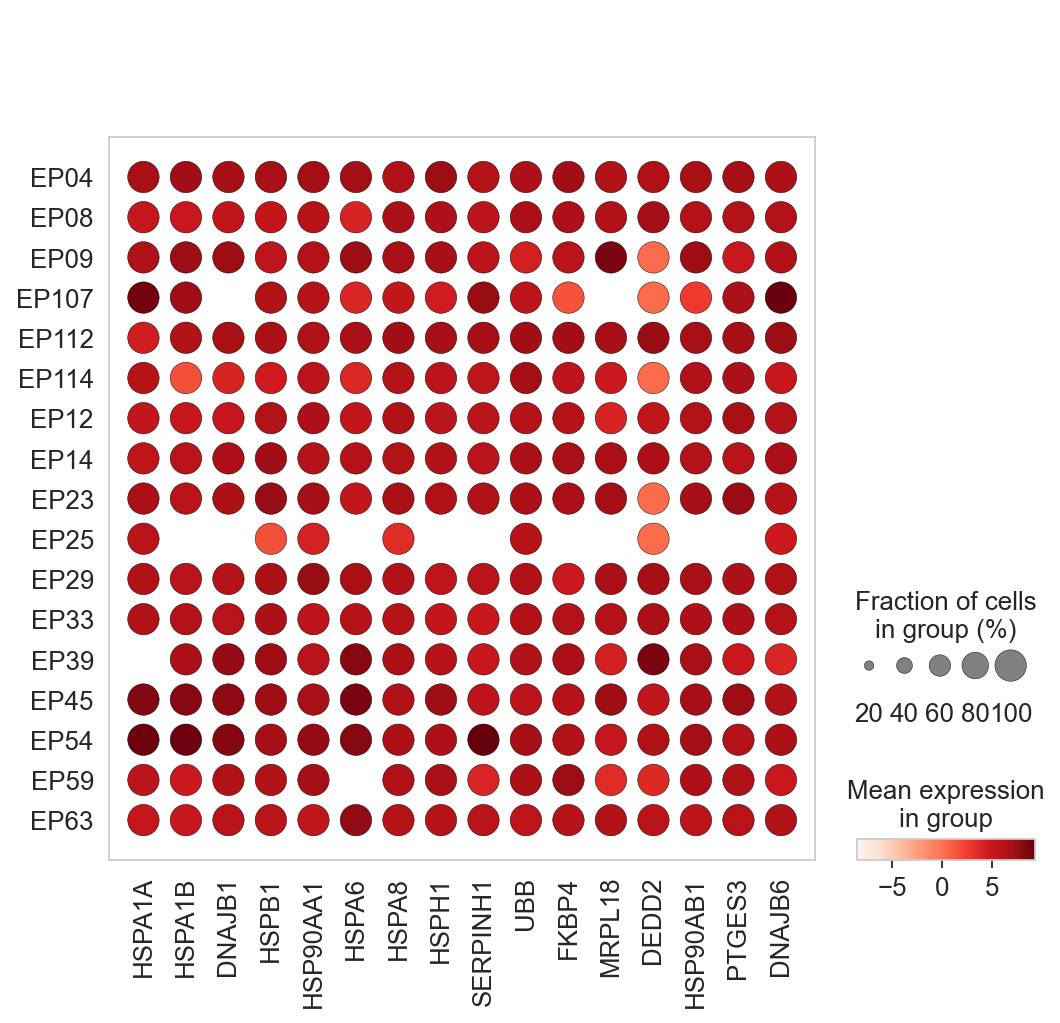

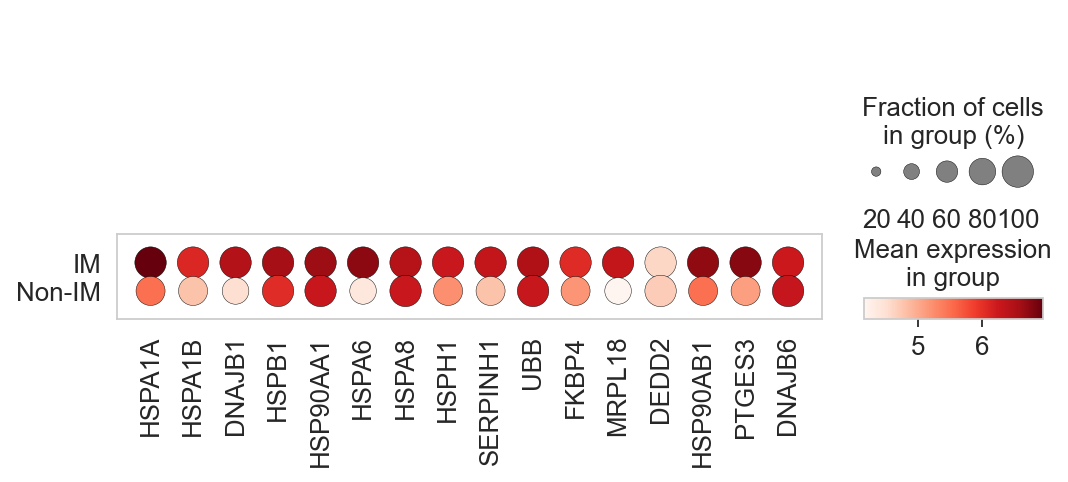

In [29]:
# HSF1_DEPENDENT_TRANSACTIVATION
sc.pl.dotplot(adata_21, ["HSPA1A", "HSPA1B", "DNAJB1", "HSPB1", "HSP90AA1",
                         "HSPA6", "HSPA8", "HSPH1", "SERPINH1", "UBB", "FKBP4", "MRPL18", "DEDD2", "HSP90AB1", "PTGES3", "DNAJB6"], groupby=['patient'])
sc.pl.dotplot(adata_21, ["HSPA1A", "HSPA1B", "DNAJB1", "HSPB1", "HSP90AA1",
                         "HSPA6", "HSPA8", "HSPH1", "SERPINH1", "UBB", "FKBP4", "MRPL18", "DEDD2", "HSP90AB1", "PTGES3", "DNAJB6"], groupby=['class'])

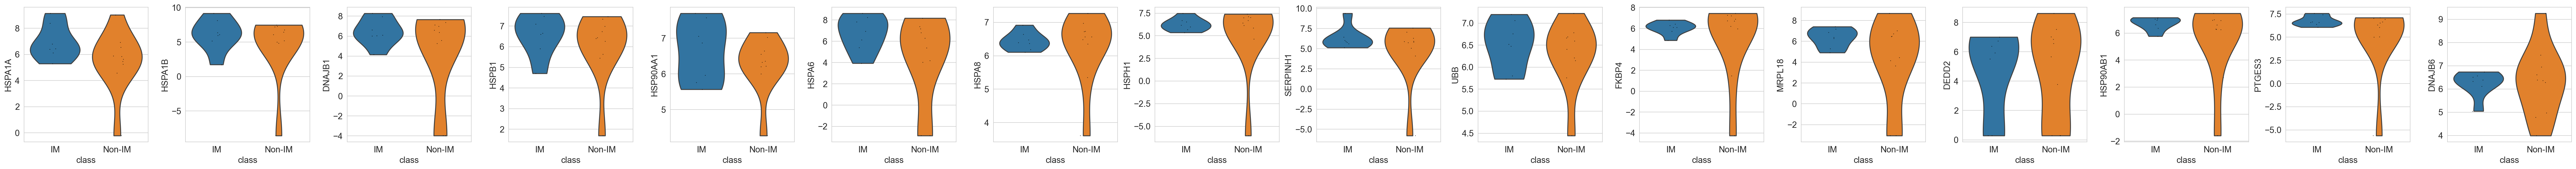

In [30]:
sc.pl.violin(adata_21, keys=["HSPA1A", "HSPA1B", "DNAJB1", "HSPB1", "HSP90AA1",
                         "HSPA6", "HSPA8", "HSPH1", "SERPINH1", "UBB", "FKBP4", "MRPL18", "DEDD2", "HSP90AB1", "PTGES3", "DNAJB6"], groupby='class')

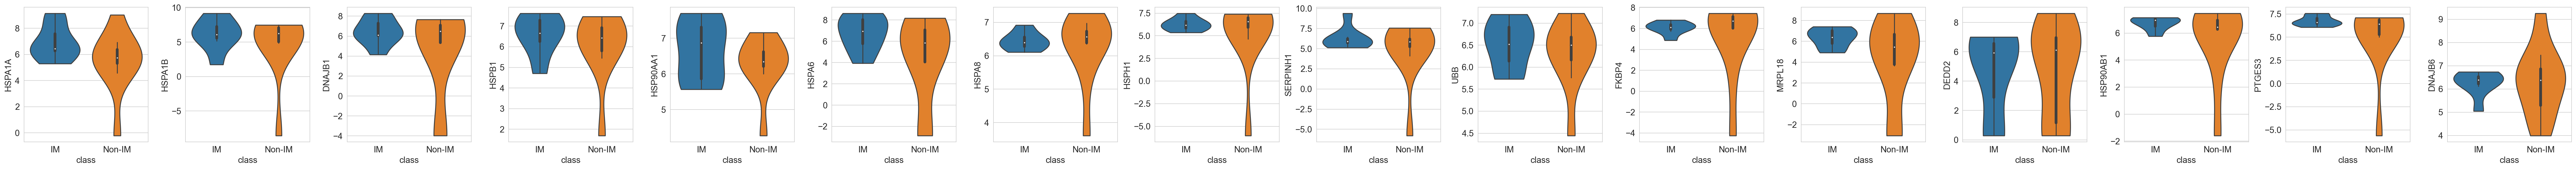

In [37]:
sc.pl.violin(adata_21, HSF1_genes, groupby='class', stripplot=False, inner='box', swap_axes=False)

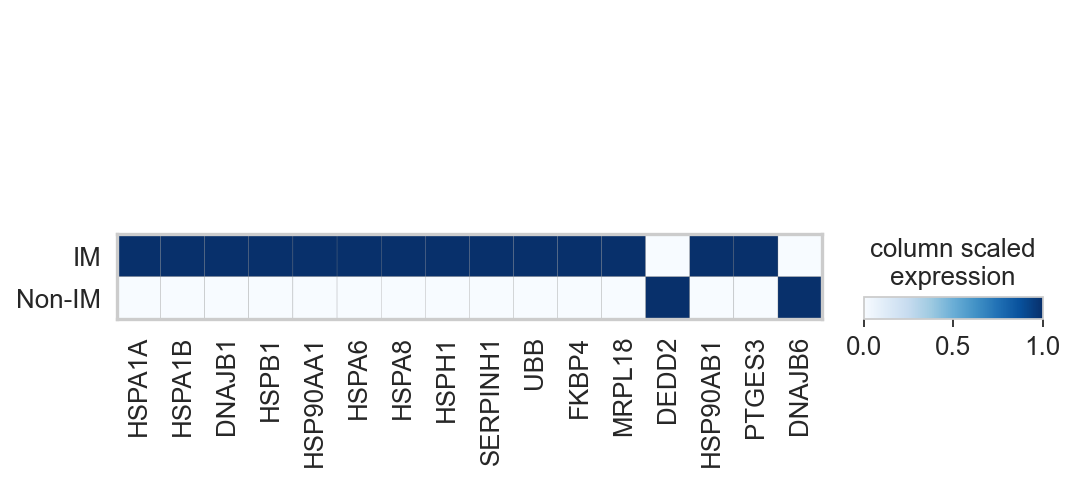

In [38]:
sc.pl.matrixplot(adata_21, HSF1_genes, 'class',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

In [43]:
# GOBP: M3T4 T cell + PBMC-R T cell shared
FGF_response= [#'CCL5', 
    'CXCL13', 'ZFP36L2', 'GATA3', 'IQGAP1', 'FIBP', 'ITGB1BP1', 'ZFP36', 'CTNNB1', 'RUNX2', 'NR4A1', 'PTPN11',
               'SETX', 'RAB14']

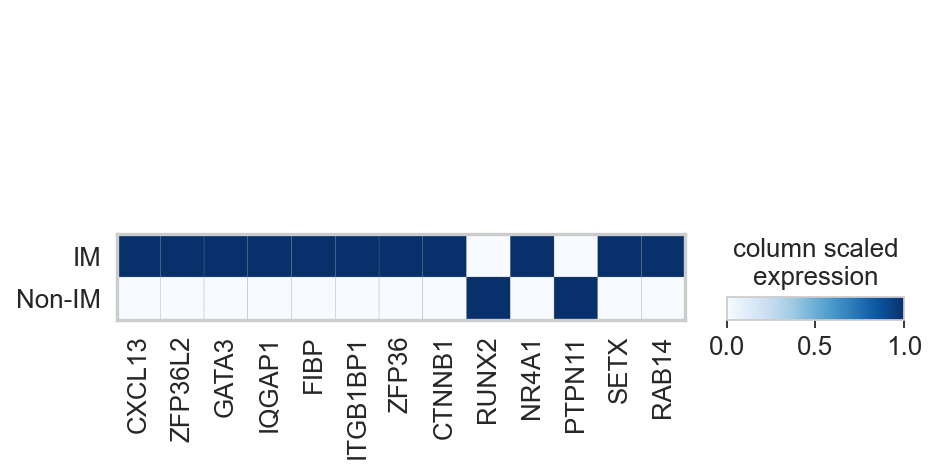

In [46]:
sc.pl.matrixplot(adata_21, FGF_response, 'class',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression', save='_FGF_response_genes.pdf')

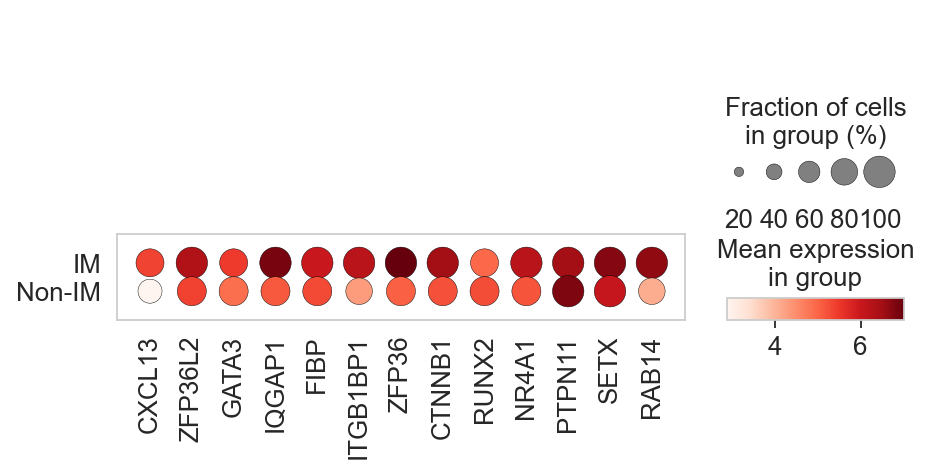

In [47]:
sc.pl.dotplot(adata_21, FGF_response, 'class', save='_FGF_response_genes.pdf')

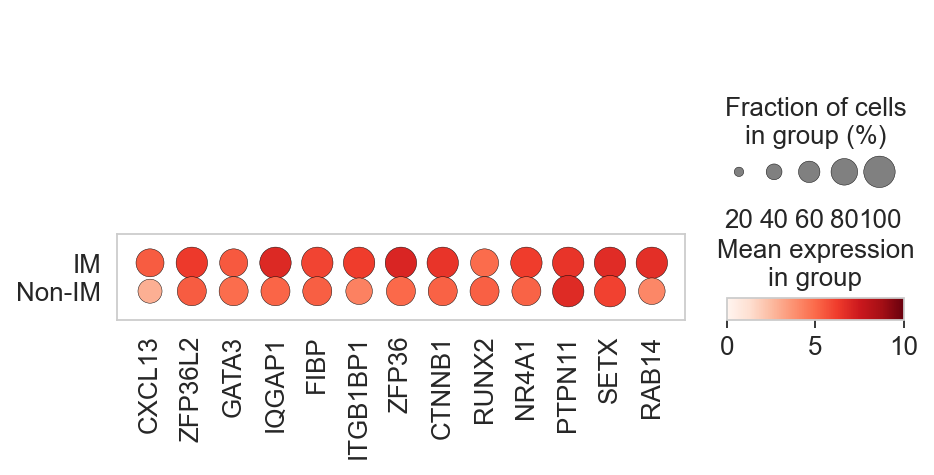

In [78]:
sc.pl.dotplot(adata_21, FGF_response, 'class', vmin=0, vmax=10,#, save='_FGF_response_genes.pdf'
             )

In [53]:
# GOBP: M3T4 T cell + PBMC-R T cell shared
IFN_G_genes = [#'HLA-DPA1', 
    'ISG15', 'HAVCR2', 'PTPN22', #'HLA-DRB1', 
    'GATA3', 'CD96', #'HLA-DPB1', 
    'KLRK1', 'CRTAM', 'LGALS9',
               'PDE4D', 'SLC7A5', 'TNFSF4', 'ZC3H12A', 'CD3E', 'CD226', 'PYCARD', 'DDIT3', 'PDE4B', 'HMGB1', 'PRNP', 'BCL3',
               'BTN3A2', 'SLAMF6', 'XCL1']

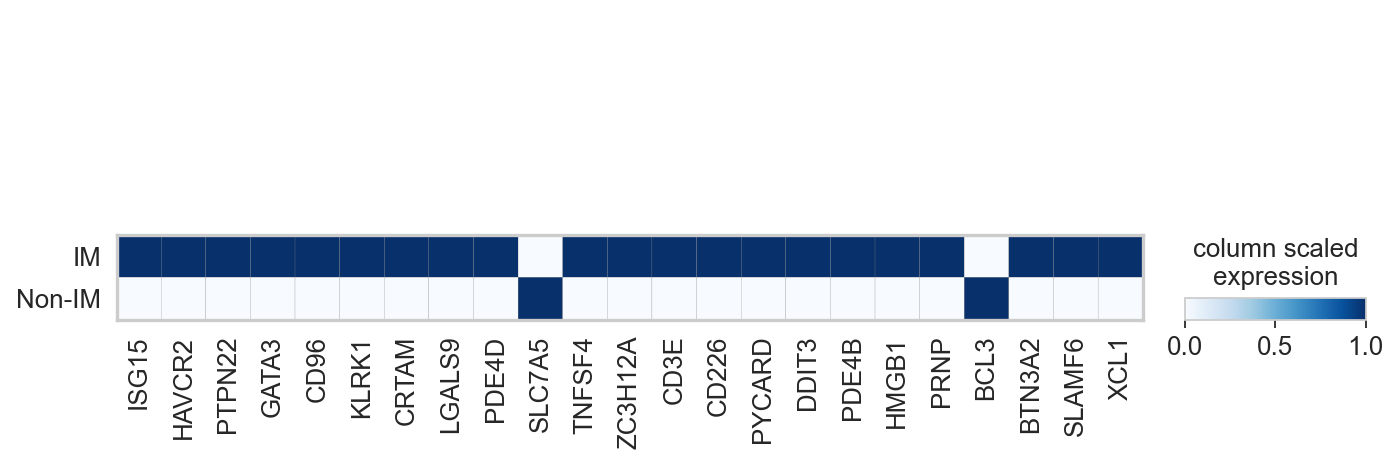

In [54]:
sc.pl.matrixplot(adata_21, IFN_G_genes, 'class',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression',
                 save='__IFN-g_genes.pdf'
                )

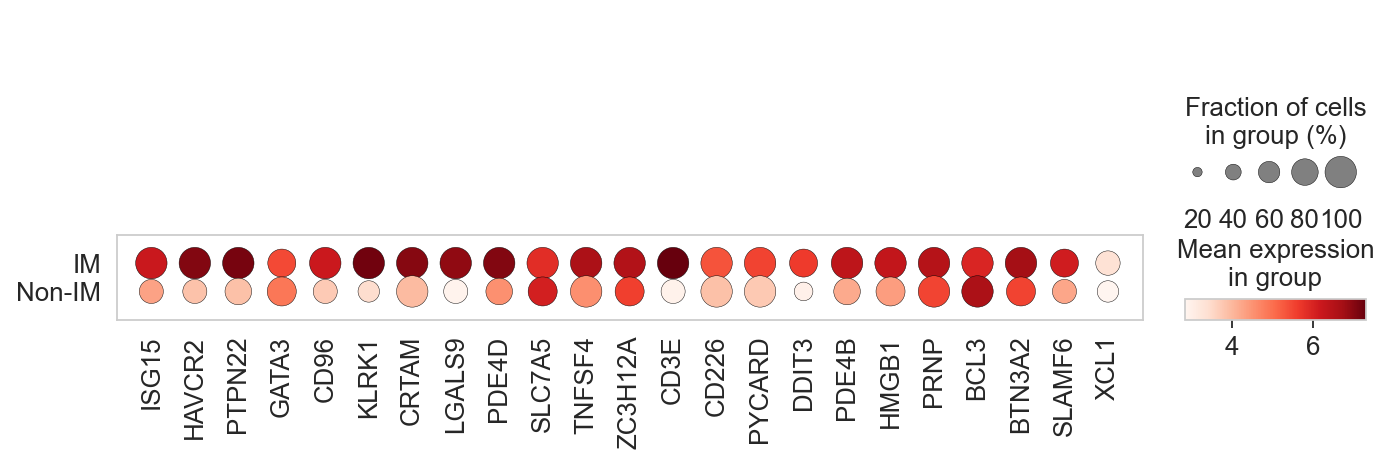

In [55]:
sc.pl.dotplot(adata_21, IFN_G_genes, 'class', save='_IFN-g_genes.pdf')

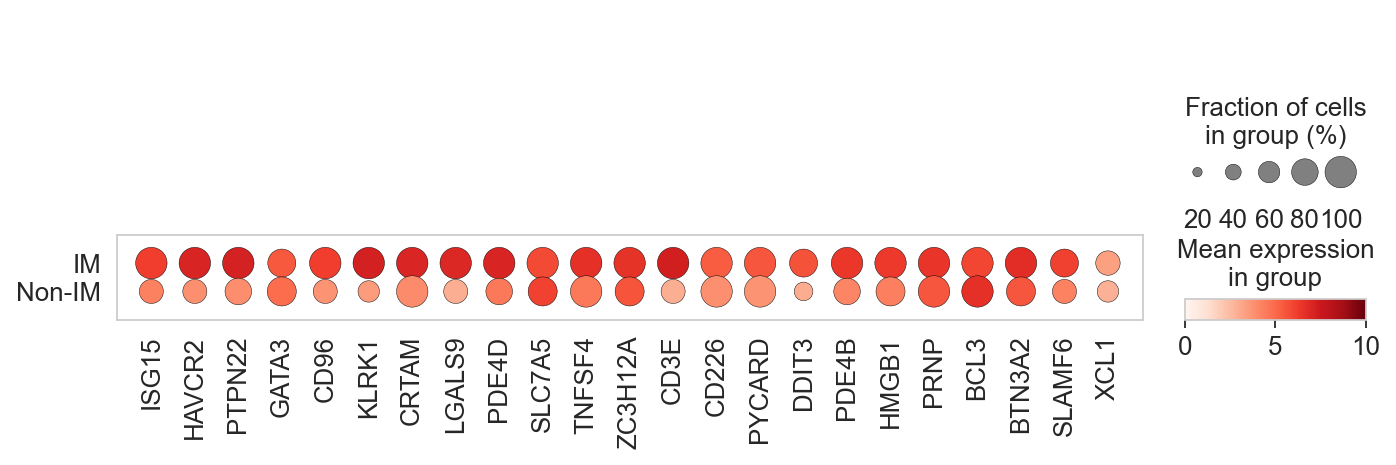

In [79]:
sc.pl.dotplot(adata_21, IFN_G_genes, 'class',vmin=0, vmax=10, #save='_IFN-g_genes.pdf'
             )

In [56]:
# HSF1 : M1T4 specific
# FGF and IFN-gamma : M3T4 and Responders shared
sc.tl.score_genes(adata_21,HSF1_genes, score_name='HSF1_score')
sc.tl.score_genes(adata_21,FGF_response, score_name='FGF_score')
sc.tl.score_genes(adata_21,IFN_G_genes, score_name='IFN-gamma_score')


computing score 'HSF1_score'
    finished: added
    'HSF1_score', score of gene set (adata.obs).
    499 total control genes are used. (0:00:00)
computing score 'FGF_score'
    finished: added
    'FGF_score', score of gene set (adata.obs).
    349 total control genes are used. (0:00:00)
computing score 'IFN-gamma_score'
    finished: added
    'IFN-gamma_score', score of gene set (adata.obs).
    650 total control genes are used. (0:00:00)


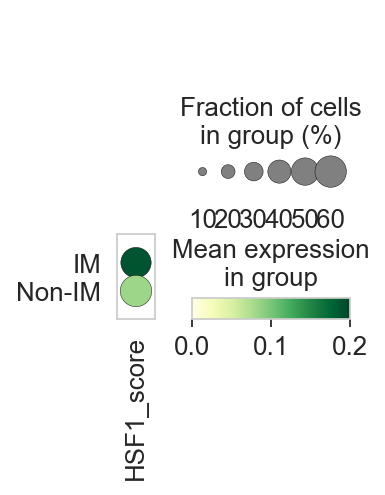

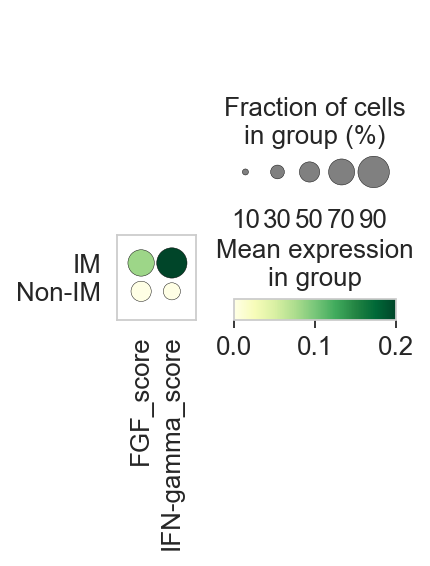

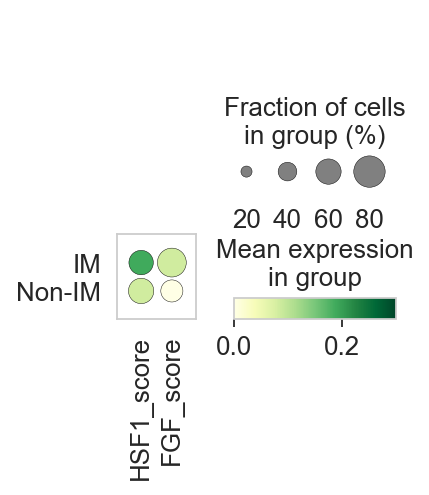

In [65]:
sc.pl.dotplot(adata_21, ['HSF1_score'],vmin=0.00,vmax=0.2,cmap='YlGn', groupby='class',
             save='_HSF1_score_in_IM_and_NonIM.pdf')
sc.pl.dotplot(adata_21, ['FGF_score','IFN-gamma_score'],vmin=0.00,vmax=0.2,cmap='YlGn', groupby='class',
             save='_FGF_IFN-gamma_score_in_IM_and_NonIM.pdf')
sc.pl.dotplot(adata_21, ['HSF1_score','FGF_score'],vmin=0.00,vmax=0.3,cmap='YlGn', groupby='class')

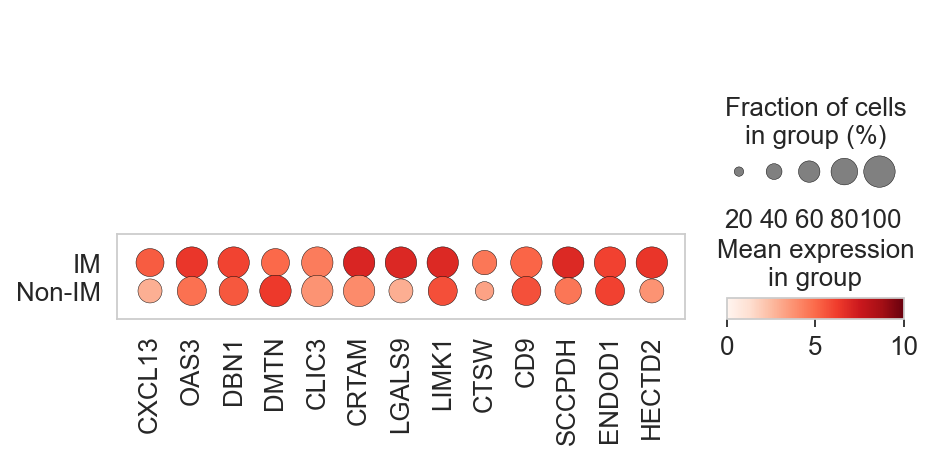

In [76]:
sc.pl.dotplot(adata_21, ['CXCL13','OAS3','DBN1','DMTN','CLIC3',#'HLA-DRB1',
                         'CRTAM','LGALS9','LIMK1',
                         'CTSW','CD9','SCCPDH','ENDOD1','HECTD2'], groupby='class', vmin=0,vmax=10)

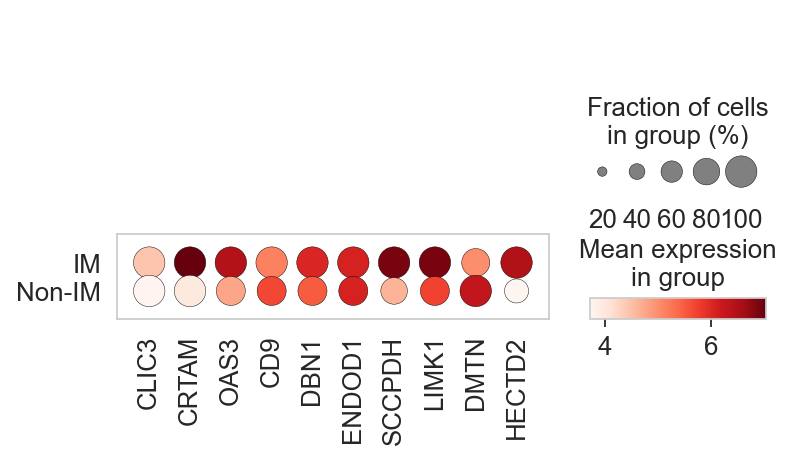

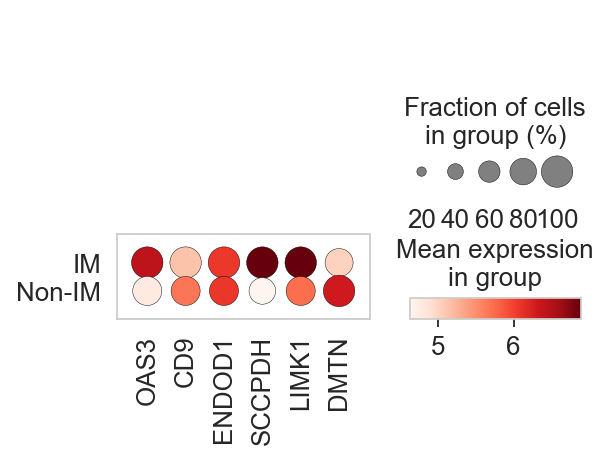

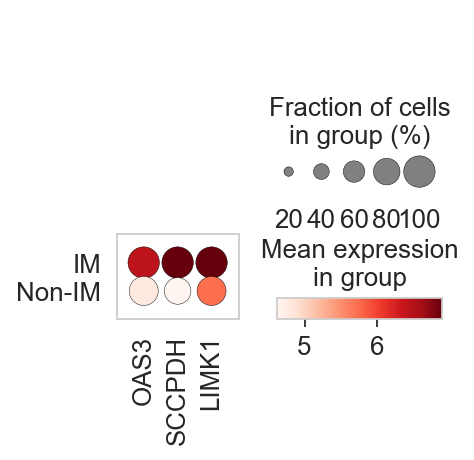

In [84]:
sc.pl.dotplot(adata_21, [
    'CLIC3','CRTAM','OAS3','CD9','DBN1','ENDOD1','SCCPDH', 'LIMK1','DMTN','HECTD2'
                        #'CXCL13',#'HLA-DRB1',
                         #'CTSW','LGALS9',
    ], groupby='class')
sc.pl.dotplot(adata_21, [
    #'CLIC3','CRTAM',
    'OAS3','CD9',#'DBN1',
    'ENDOD1','SCCPDH', 'LIMK1','DMTN',#'HECTD2'
                        #'CXCL13',#'HLA-DRB1',
                         #'CTSW','LGALS9',
    ], groupby='class')
sc.pl.dotplot(adata_21, ['OAS3', 'SCCPDH', 'LIMK1',
    #'CLIC3','CRTAM',#'CD9',#'DBN1', #'ENDOD1', #'DMTN',#'HECTD2',#'CXCL13',#'HLA-DRB1', #'CTSW','LGALS9',
    ], groupby='class', save='_OAS3,SCCPDH,LIMK1_IM_NonIM.pdf')

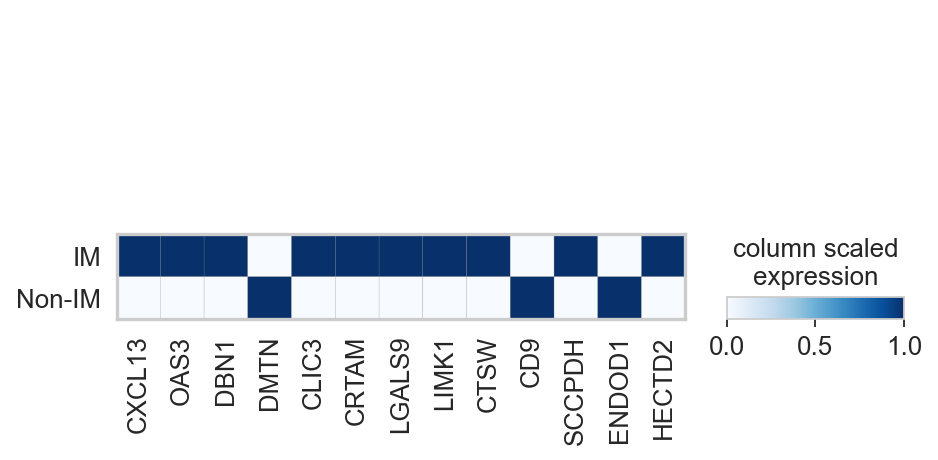

In [70]:
sc.pl.matrixplot(adata_21,  ['CXCL13','OAS3','DBN1','DMTN','CLIC3',#'HLA-DRB1',
                         'CRTAM','LGALS9','LIMK1',
                         'CTSW','CD9','SCCPDH','ENDOD1','HECTD2'], 'class',  cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression',
                 #save='__IFN-g_genes.pdf'
                )